In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
Student = namedtuple("Student", ["name", "grade", "gender"])
Score = namedtuple("Score", ["value", "unit", "percentile"])
ordinal_suffixes = ["th", "st", "nd", "rd", "th", "th", "th", "th", "th", "th"]

In [3]:
def to_ordinal(num):
    """convert an integer to an ordinal string, e.g. 2 -> '2nd'"""
    suffixes = {str(i): v for i, v in enumerate(ordinal_suffixes)}
    v = str(num)
    # special case early teens
    if v in {"11", "12", "13"}:
        return f"{v}th"
    return f"{v}{suffixes[v[-1]]}"

In [4]:
def format_score(score):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    return f"{score.value}\n{score.unit}" if score.unit else str(score.value)

In [5]:
def plot_student_results(student, scores_by_test, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7), constrained_layout=True)
    fig.canvas.manager.set_window_title("eldorado K-8 Fitness Chart")
    
    ax1.set_title(student.name)
    ax1.set_xlabel(f"percentile ranking across f{to_ordinal(student.grade)} grade {student.gender.title()}\ncohort size: {cohort_size}")
    
    test_names = list(scores_by_test.keys())
    percentiles = [score.percentile for score in scores_by_test.values()]
    
    rects = ax1.barh(test_names, percentiles, align="center", height=0.5)
    # partition the percentile values to be able to draw large numbers in
    # white within the bar, and small numbers in black outside the bar
    large_percentiles = [to_ordinal(p) if p > 40 else "" for p in percentiles]
    small_percentiles = [to_ordinal(p) if p <= 40 else "" for p in percentiles]
    
    ax1.bar_label(rects, small_percentiles, padding=5, color="black", fontweight="bold")
    ax1.bar_label(rects, large_percentiles, padding=-32, color="white", fontweight="bold")
    
    ax1.set_xlim([0, 100])
    ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax1.xaxis.grid(True, linestyle="--", which="major", color="grey", alpha=0.25)
    ax1.axvline(50, color="grey", alpha=0.25) # median position
    
    # set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()
    # set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())
    # set the tick locations and labels
    ax2.set_yticks(
        np.arange(len(scores_by_test)),
        labels=[format_score(score) for score in scores_by_test.values()]
    )
    
    ax2.set_ylabel("test scores")

In [6]:
student = Student(name="Johnny Doe", grade=2, gender="Boy")
scores_by_test = {
    "Pacer Test": Score(7, "laps", percentile=37),
    "Flexed Arm\n Hang": Score(48, "sec", percentile=95),
    "Mile Run": Score("12:52", "min:sec", percentile=73),
    "Agility": Score(17, "sec", percentile=60),
    "Push Ups": Score(14, "", percentile=16),
}

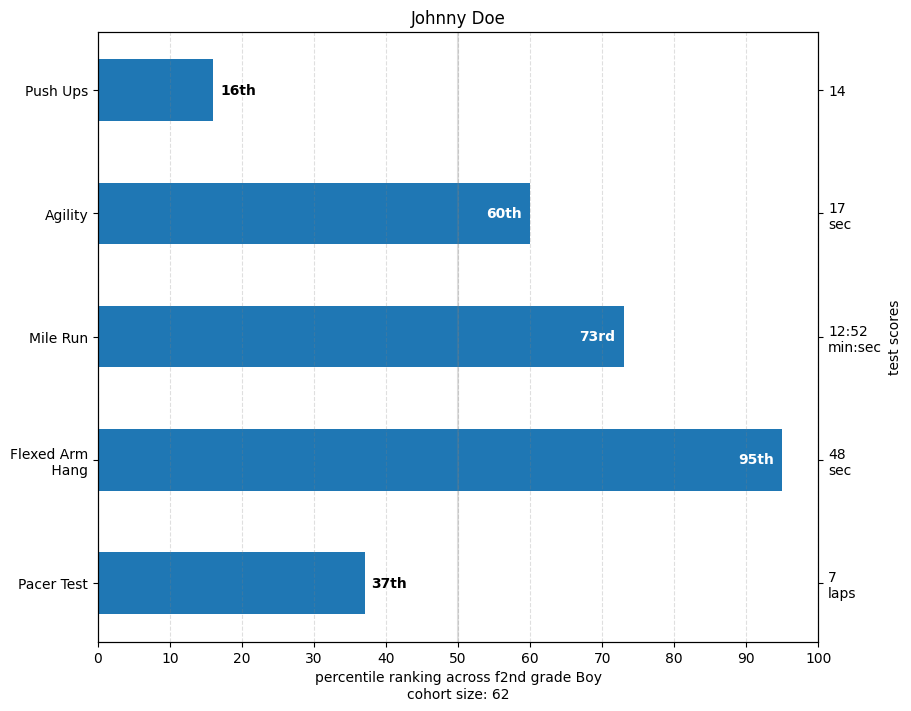

In [7]:
plot_student_results(student, scores_by_test, cohort_size=62)
plt.show()